## Florenz Jaizzer P. Calderon

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

def char_lagrange(z, x):
    # Determine the length of the inputs
    nx = len(x)
    z_length = len(z)

    # Initialize the matrix to store the evaluated Lagrange characteristic polynomials
    evaluated_characteristic_polynomial = [[0 for _ in range(z_length)] for _ in range(nx)]

    # Evaluate the Lagrange characteristic polynomial at x_k with z_i
    for k in range(nx):
        for i in range(z_length):
            result = 1
            for m in range(nx):
                if m != k:
                    result = result * (z[i] - x[m]) / (x[k] - x[m])
            evaluated_characteristic_polynomial[k][i] = result
    return evaluated_characteristic_polynomial

def lagrange2D(zx, zy, x, y, w):
    # Determine the length of x
    nx = len(x)

    # Determine the length of y
    ny = len(y)

    # Determine the length of zx
    mx = len(zx)

    # Determine the lenght of zy
    my = len(zy)

    # Evaluate the Lagrange characteristic polynomials on the x-axis
    evaluated_characteristic_polynomial_x = char_lagrange(zx, x)

    # Evaluate the Lagrange characteristic polynomials on the y-axis
    evaluated_characteristic_polynomial_y = char_lagrange(zy, y)

    # Initialize the vector that will store the evaluated 2D Lagrange interpolation formula
    evaluated_lagrange_interpolation_formula_2D = [[0 for _ in range(my)] for _ in range(mx)]

    # Evaluate the 2D Lagrange interpolation formula
    for zx_index in range(mx):
        for zy_index in range(my):
            outer_result = 0
            for i in range(nx):
                inner_result = 0
                for j in range(ny):
                    inner_result += w[i][j] * evaluated_characteristic_polynomial_x[i][zx_index] * evaluated_characteristic_polynomial_y[j][zy_index]
                outer_result += inner_result
            evaluated_lagrange_interpolation_formula_2D[zx_index][zy_index] = outer_result

    return evaluated_lagrange_interpolation_formula_2D

#Initialize the interpolation nodes to be used for Lagrange Interpolation

In [4]:
"""
Initialize the interpolation nodes to be used for Lagrange Interpolation
"""

# Interpolation Nodes
x_interpolation_nodes = np.linspace(-1, 2, 10)
y_interpolation_nodes = np.linspace(-2, 2, 10)

# W data from Google Drive
W_interpolation_nodes = [
        [2.260329406981054240e-06, 7.673192648360093273e-06,2.085790014230277754e-05,4.539992976248485417e-05,7.912794612036177339e-05,1.104319447771195890e-04,1.234098040866795612e-04,1.104319447771195890e-04,7.912794612036177339e-05,4.539992976248485417e-05],
        [2.669954063117813402e-05, 9.063754966554979050e-05,2.463784042319182343e-04,5.362746091796782681e-04,9.346778420779018430e-04,1.304448009856573176e-03,1.457745525197095757e-03,1.304448009856574260e-03,9.346778420779018430e-04,5.362746091796782681e-04],
        [2.124529250204041243e-04, 7.212188707337513017e-04,1.960476150657309170e-03,4.267231069936552011e-03,7.437395431040693013e-03,1.037972147383890015e-02,1.159953667524437834e-02,1.037972147383890882e-02,7.437395431040693013e-03,4.267231069936552011e-03],
        [1.138802761345787586e-03, 3.865920139472804086e-03,1.050866046540278181e-02,2.287346491123889991e-02,3.986636782372491444e-02,5.563799827784279145e-02,6.217652402211629181e-02,5.563799827784281227e-02,3.986636782372493526e-02,2.287346491123889991e-02],
        [4.112076444169911020e-03, 1.395936125214680690e-02,3.794547802860596952e-02,8.259326325034499483e-02,1.439525417455284062e-01,2.009019558827834229e-01,2.245117666465471229e-01,2.009019558827834784e-01,1.439525417455284340e-01,8.259326325034499483e-02],
        [1.000231941277372576e-02, 3.395510563531246168e-02,9.229954663187718567e-02,2.009019558827835061e-01,3.501538267511653535e-01,4.886790313053682722e-01,5.461081359780511901e-01,4.886790313053683832e-01,3.501538267511654090e-01,2.009019558827835061e-01],
        [1.638955379021359016e-02, 5.563799827784279145e-02,1.512397596904957175e-01,3.291929878079055682e-01,5.737534207374326289e-01,8.007374029168078389e-01,8.948393168143696785e-01,8.007374029168081719e-01,5.737534207374328510e-01,3.291929878079055682e-01],
        [1.809090996006276764e-02, 6.141363151714355345e-02,1.669395585727310727e-01,3.633656399769043532e-01,6.333132437099517897e-01,8.838598318931834008e-01,9.877302162356106363e-01,8.838598318931837339e-01,6.333132437099520118e-01,3.633656399769043532e-01],
        [1.345180507918091774e-02, 4.566515461063024722e-02,1.241307599718489835e-01,2.701867276014116581e-01,4.709108788478272856e-01,6.572090736282378831e-01,7.344436719297313676e-01,6.572090736282381052e-01,4.709108788478273966e-01,2.701867276014116581e-01],
        [6.737946999085467001e-03, 2.287346491123889991e-02,6.217652402211629181e-02,1.353352832366127023e-01,2.358770829856999540e-01,3.291929878079055682e-01,3.678794411714423340e-01,3.291929878079056238e-01,2.358770829857000650e-01,1.353352832366127023e-01]
    ]
X_interpolation_nodes,Y_interpolation_nodes = np.meshgrid(x_interpolation_nodes,y_interpolation_nodes)


# Create the figures before performing Lagrange Interpolation

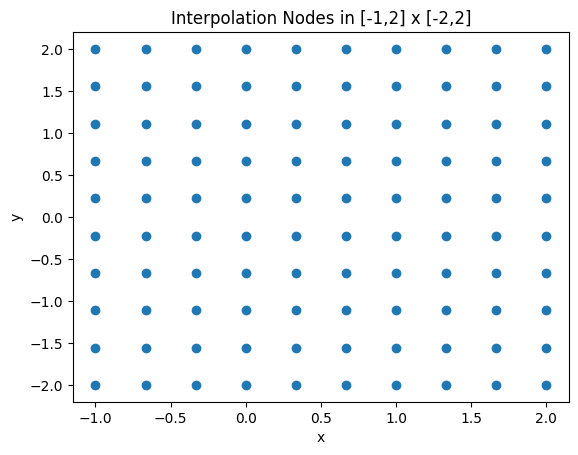

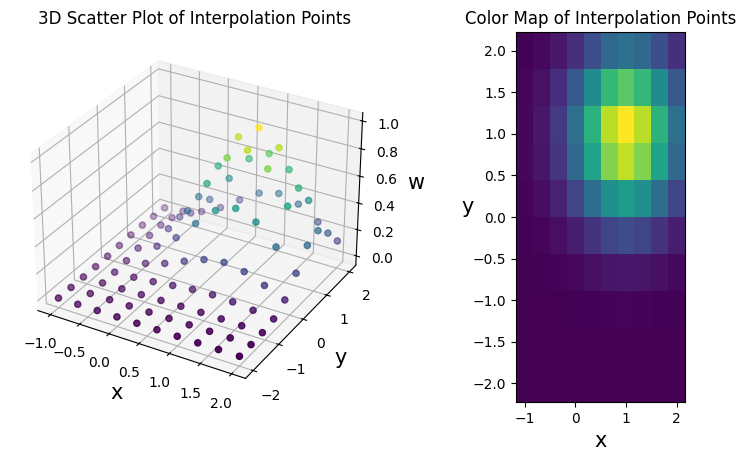

In [5]:
"""
Create the figures before performing Lagrange Interpolation
"""

plt.title("Interpolation Nodes in [-1,2] x [-2,2]")
plt.scatter(X_interpolation_nodes,Y_interpolation_nodes)
plt.xlabel("x"); plt.ylabel("y")
plt.show()

fig = plt.figure(figsize=plt.figaspect(.5))
fig.tight_layout()
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])

ax = fig.add_subplot(gs[1])
ax.pcolormesh(X_interpolation_nodes, Y_interpolation_nodes, W_interpolation_nodes)
ax.set_xlabel('x',fontsize = 15); ax.set_ylabel('y',rotation = 0,fontsize = 15)
ax.set_title('Color Map of Interpolation Points')

ax = fig.add_subplot(gs[0],projection='3d')
ax.scatter(X_interpolation_nodes, Y_interpolation_nodes, W_interpolation_nodes, c=W_interpolation_nodes, cmap='viridis')
ax.set_xlabel('x',fontsize = 15); ax.set_ylabel('y',fontsize = 15); ax.set_zlabel('w',linespacing=3.4,fontsize = 15)
ax.set_title('3D Scatter Plot of Interpolation Points')
plt.show()

# Create the figures after performing Lagrange Interpolation with M x N gridpoints

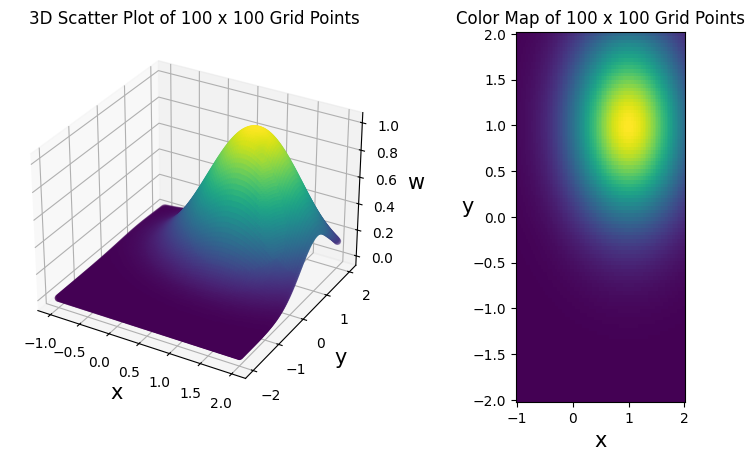

In [7]:
"""
Create the figures after performing Lagrange Interpolation with M x N gridpoints
"""

M = 100
N = 100

x_lagrange = np.linspace(-1, 2, M)
y_lagrange = np.linspace(-2, 2, N)
X_lagrange,Y_lagrange = np.meshgrid(x_lagrange,y_lagrange)
W_lagrange = lagrange2D(x_lagrange, y_lagrange, x_interpolation_nodes, y_interpolation_nodes, W_interpolation_nodes)

fig = plt.figure(figsize=plt.figaspect(.5))
fig.tight_layout()
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])

ax = fig.add_subplot(gs[1])
ax.pcolormesh(X_lagrange, Y_lagrange, W_lagrange)
ax.set_xlabel('x',fontsize = 15); ax.set_ylabel('y',rotation = 0,fontsize = 15)
ax.set_title(f'Color Map of {M} x {N} Grid Points')

ax = fig.add_subplot(gs[0],projection='3d')
ax.scatter(X_lagrange, Y_lagrange, W_lagrange, c=W_lagrange, cmap='viridis')
ax.set_xlabel('x',fontsize = 15); ax.set_ylabel('y',fontsize = 15); ax.set_zlabel('w',linespacing=3.4,fontsize = 15)
ax.set_title(f'3D Scatter Plot of {M} x {N} Grid Points')
plt.show()